In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error

# Create a synthetic dataset
np.random.seed(42)
n_samples = 1000
n_features = 200

# Generate random features
X = np.random.randn(n_samples, n_features)

# Create a true relationship with some noise
true_coefficients = np.random.randn(n_features)
y = X @ true_coefficients + np.random.normal(scale=5, size=n_samples)  # adding noise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [83]:
# Initialize models
linear_model = LinearRegression()
lasso_model = Lasso(alpha=0.1)
ridge_model = Ridge(alpha=1)
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # 50% L1 and 50% L2

# Fit the models
linear_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
elastic_net_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_elastic_net = elastic_net_model.predict(X_test)

# Calculate Mean Squared Error
mse_results = {
    "Linear Regression": mean_squared_error(y_test, y_pred_linear),
    "Lasso Regression": mean_squared_error(y_test, y_pred_lasso),
    "Ridge Regression": mean_squared_error(y_test, y_pred_ridge),
    "Elastic Net": mean_squared_error(y_test, y_pred_elastic_net),
}

# Display MSE results
print("Mean Squared Errors:")
for model, mse in mse_results.items():
    print(f"{model}: {mse:.2f}")


Mean Squared Errors:
Linear Regression: 38.17
Lasso Regression: 39.81
Ridge Regression: 38.12
Elastic Net: 38.46


In [84]:
# Create a parameter grid for each model
param_grid_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}
param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}
param_grid_elastic_net = {'alpha': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.99]}

# Initialize models
lasso = Lasso()
ridge = Ridge()
elastic_net = ElasticNet()

# Perform Grid Search
grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_elastic_net = GridSearchCV(elastic_net, param_grid_elastic_net, cv=5, scoring='neg_mean_squared_error')

# Fit Grid Search models
grid_search_lasso.fit(X_train, y_train)
grid_search_ridge.fit(X_train, y_train)
grid_search_elastic_net.fit(X_train, y_train)

# Get the best models
best_lasso = grid_search_lasso.best_estimator_
best_ridge = grid_search_ridge.best_estimator_
best_elastic_net = grid_search_elastic_net.best_estimator_

# Make predictions with best models
y_pred_best_lasso = best_lasso.predict(X_test)
y_pred_best_ridge = best_ridge.predict(X_test)
y_pred_best_elastic_net = best_elastic_net.predict(X_test)

# Calculate Mean Squared Error for best models
mse_results = {
    "Linear Regression": mean_squared_error(y_test, y_pred_linear),
    "Best Lasso": mean_squared_error(y_test, y_pred_best_lasso),
    "Best Ridge": mean_squared_error(y_test, y_pred_best_ridge),
    "Best Elastic Net": mean_squared_error(y_test, y_pred_best_elastic_net),
}

# Display MSE results
print("Mean Squared Errors after Grid Search:")
for model, mse in mse_results.items():
    print(f"{model}: {mse:.2f}")


Mean Squared Errors after Grid Search:
Linear Regression: 38.17
Best Lasso: 38.02
Best Ridge: 37.69
Best Elastic Net: 37.78


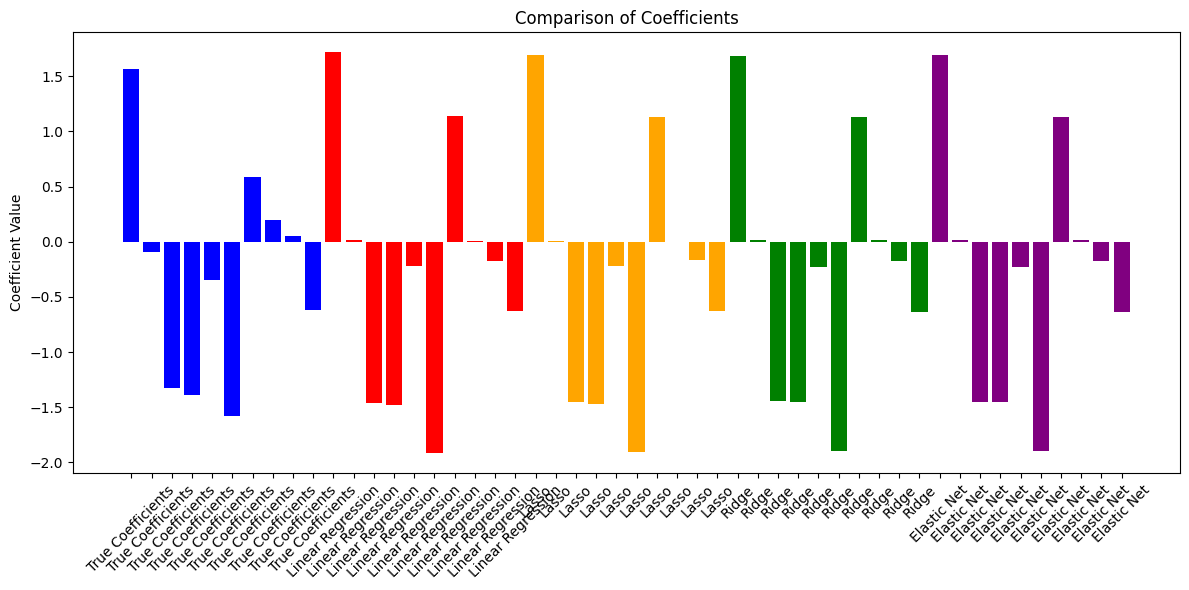

In [89]:
n_features = 10
true_coefficients = true_coefficients[:n_features]
linear_model_coef = linear_model.coef_[:n_features]
lasso_coef = best_lasso.coef_[:n_features]
ridge_coef = best_ridge.coef_[:n_features]
elastic_net_coef = best_elastic_net.coef_[:n_features]

# Concatenate the coefficients
all_coefficients = np.concatenate((
    true_coefficients, 
    linear_model_coef, 
    lasso_coef, 
    ridge_coef, 
    elastic_net_coef
))

# Define labels for the x-axis
labels = (
    ['True Coefficients'] * n_features + 
    ['Linear Regression'] * n_features + 
    ['Lasso'] * n_features + 
    ['Ridge'] * n_features + 
    ['Elastic Net'] * n_features
)

plt.figure(figsize=(12, 6))
plt.bar(range(len(all_coefficients)), all_coefficients, 
        color=['blue'] * n_features + 
              ['red'] * n_features + 
              ['orange'] * n_features + 
              ['green'] * n_features + 
              ['purple'] * n_features)

plt.xticks(range(len(all_coefficients)), labels, rotation=45)
plt.title('Comparison of Coefficients')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()